# Data Explore

In [16]:
import os
import ee
import geemap.core as geemap
import pandas as pd
import geopandas as gpd
import urllib.request

from IPython.display import Image

In [2]:
from libs.ee import initialize_ee

ee = initialize_ee(get_ipython())

from libs.s2cloudless import S2Cloudless
from libs.sentinel import mask_s2_clouds

# Load data

In [3]:
directory = 'data/NZ_landslide_inventory/'
auckland_filepath = f'{directory}/cleaned_auckland.gpkg'
gdf = gpd.read_file(auckland_filepath, layer='landslides')
gdf[gdf['dateoccurence'].notnull()]

,GlobalID,latitude,longitude,region,dateoccurence,closestdate,geometry
0,cb20f8d7-abeb-4ce5-bafa-a75c01b03136,-36.931306,174.701880,Auckland Region,2023-02-13 23:00:00,2023-02-13 23:00:00,POINT (174.70188 -36.93131)
1,9da581bc-ff20-454f-b6fb-721279cd347a,-36.924269,174.705747,Auckland Region,2023-01-30 23:00:00,2023-01-30 23:00:00,POINT (174.70575 -36.92427)
2,2a361da4-7adf-4f4d-b94c-f3cf9ccccc46,-36.867368,174.738318,Auckland Region,2023-01-31 23:00:00,2023-01-31 23:00:00,POINT (174.73832 -36.86737)
3,4470b30b-6c80-46be-b0f7-e4ec0a5d72fd,-36.861593,174.655298,Auckland Region,2023-02-13 23:00:00,2023-02-13 23:00:00,POINT (174.6553 -36.86159)
4,cfcff56a-7cc6-41f5-9e7e-8da0daa5dbde,-36.817738,174.728127,Auckland Region,2023-01-31 23:00:00,2023-01-31 23:00:00,POINT (174.72813 -36.81774)
...,...,...,...,...,...,...,...
11911,8ac9ffa6-d365-4cb0-bc15-e54c10a63d8b,-36.807419,174.690856,Auckland Region,2023-01-26 11:00:00,2023-01-26 11:00:00,POINT (174.69086 -36.80742)
11912,2801a385-dc6a-44b3-9355-64140b2f1929,-37.133864,174.706530,Auckland Region,2023-01-26 11:00:00,2023-01-26 11:00:00,POINT (174.70653 -37.13386)
11913,c8cc9f20-efac-41b4-bf62-55a625a2ab6e,-36.938192,174.629223,Auckland Region,2023-01-26 11:00:00,2023-01-26 11:00:00,POINT (174.62922 -36.93819)
11914,fa946895-4967-4a14-9b59-48dd0898766e,-36.944683,174.663084,Auckland Region,2023-01-27 11:00:00,2023-01-27 08:00:00,POINT (174.66308 -36.94468)


In [4]:
gdf_jan = gdf[(gdf['dateoccurence'] >= '2023-01-01') & (gdf['dateoccurence'] < '2023-02-28')]
jan_gdf = gdf_jan.reset_index(drop=True)

In [5]:
gdf_jan

,GlobalID,latitude,longitude,region,dateoccurence,closestdate,geometry
0,cb20f8d7-abeb-4ce5-bafa-a75c01b03136,-36.931306,174.701880,Auckland Region,2023-02-13 23:00:00,2023-02-13 23:00:00,POINT (174.70188 -36.93131)
1,9da581bc-ff20-454f-b6fb-721279cd347a,-36.924269,174.705747,Auckland Region,2023-01-30 23:00:00,2023-01-30 23:00:00,POINT (174.70575 -36.92427)
2,2a361da4-7adf-4f4d-b94c-f3cf9ccccc46,-36.867368,174.738318,Auckland Region,2023-01-31 23:00:00,2023-01-31 23:00:00,POINT (174.73832 -36.86737)
3,4470b30b-6c80-46be-b0f7-e4ec0a5d72fd,-36.861593,174.655298,Auckland Region,2023-02-13 23:00:00,2023-02-13 23:00:00,POINT (174.6553 -36.86159)
4,cfcff56a-7cc6-41f5-9e7e-8da0daa5dbde,-36.817738,174.728127,Auckland Region,2023-01-31 23:00:00,2023-01-31 23:00:00,POINT (174.72813 -36.81774)
...,...,...,...,...,...,...,...
11911,8ac9ffa6-d365-4cb0-bc15-e54c10a63d8b,-36.807419,174.690856,Auckland Region,2023-01-26 11:00:00,2023-01-26 11:00:00,POINT (174.69086 -36.80742)
11912,2801a385-dc6a-44b3-9355-64140b2f1929,-37.133864,174.706530,Auckland Region,2023-01-26 11:00:00,2023-01-26 11:00:00,POINT (174.70653 -37.13386)
11913,c8cc9f20-efac-41b4-bf62-55a625a2ab6e,-36.938192,174.629223,Auckland Region,2023-01-26 11:00:00,2023-01-26 11:00:00,POINT (174.62922 -36.93819)
11914,fa946895-4967-4a14-9b59-48dd0898766e,-36.944683,174.663084,Auckland Region,2023-01-27 11:00:00,2023-01-27 08:00:00,POINT (174.66308 -36.94468)


In [6]:
idx = 0
event = gdf_jan.iloc[idx]
point = event.geometry.centroid
points = gdf_jan.geometry.centroid
start_date = gdf_jan['dateoccurence'].min().date().strftime("%Y-%m-%d")
end_date = ( gdf_jan['dateoccurence'].min().date() + pd.Timedelta(days=91)).strftime("%Y-%m-%d")
point = ee.Geometry.Point(point.x, point.y)

In [7]:
start_date, end_date

('2023-01-26', '2023-04-27')

## Quick preview on map

In [8]:
dataset = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterDate(start_date, end_date)
    # Pre-filter to get less cloudy granules.
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))
    .map(mask_s2_clouds)
)

visualization = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B4', 'B3', 'B2'],
}

In [9]:
# Convert GeoSeries to a list of ee.Geometry.Point
ee_points = [ee.Geometry.Point([p.x, p.y]) for p in points]

# Create an ee.FeatureCollection from the points
ee_features = [ee.Feature(p) for p in ee_points]
ee_feature_collection = ee.FeatureCollection(ee_features)

In [10]:
# m = geemap.Map()
# m.set_center(point.coordinates().get(0).getInfo(), point.coordinates().get(1).getInfo(), 15)
# m.add_layer(dataset.min(), visualization, 'RGB')
# m.add_layer(point, {'color': 'red'}, 'My Pinpoint')
# # Add the FeatureCollection to the map
# m.addLayer(ee_feature_collection, {'color': 'red'}, 'Landslide Points')

# m

## Cloud removal

In [11]:
s2cloudless = S2Cloudless(ee)
# point = points[0]
aoi = ee.Geometry.Point(point.coordinates().get(0).getInfo(), point.coordinates().get(1).getInfo()).buffer(1000)
# start_date
# end_date,
buffer=50
cloud_filter=60

In [12]:
# s2_sr_cld_col_eval = s2cloudless._get_s2_sr_cld_col(aoi, start_date, end_date, cloud_filter)
# # As ever, a good idea to do a quick viusalization check
# Map = geemap.Map()
# Map.centerObject(aoi, 12)
# Map.addLayer(s2_sr_cld_col_eval, {'bands':['B4','B3','B2'], 'min':0, 'max':3000}, 'S2 collection (before)')
# Map.addLayer(point, {'color': 'red'}, 'My Pinpoint')
# Map

In [13]:
# m_cloud = s2cloudless.cloud_layers_map(aoi, start_date, end_date, buffer=buffer, cloud_filter=cloud_filter)
# m_cloud.addLayer(point, {'color': 'red'}, 'My Pinpoint')
# m_cloud

In [14]:
m_cloud_free = s2cloudless.cloud_free_map(aoi, start_date, end_date, buffer=buffer, cloud_filter=cloud_filter)
m_cloud_free.addLayer(point, {'color': 'red'}, 'My Pinpoint')
m_cloud_free

Map(center=[-36.93130544085776, 174.7018805231759], controls=(WidgetControl(options=['position', 'transparent_…

'Filename ./data/2-data-explore-events/0_174.701880487593_-36.931306466746_2023-02-13_2023-03-06.png'

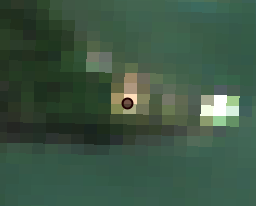

'Filename ./data/2-data-explore-events/1_174.70574721288_-36.9242685339089_2023-01-30_2023-02-20.png'

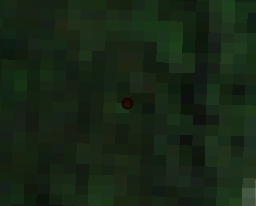

'Filename ./data/2-data-explore-events/2_174.738317563251_-36.8673683761872_2023-01-31_2023-02-21.png'

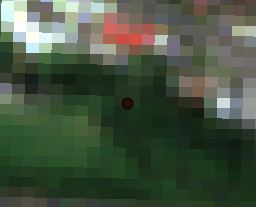

'Filename ./data/2-data-explore-events/3_174.655298082793_-36.8615929062174_2023-02-13_2023-03-06.png'

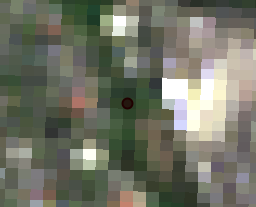

'Filename ./data/2-data-explore-events/4_174.728126662222_-36.8177384118568_2023-01-31_2023-02-21.png'

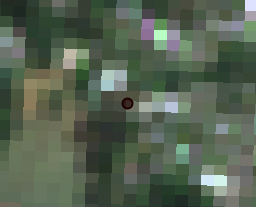

'Filename ./data/2-data-explore-events/5_174.767440064505_-36.9257813698387_2023-01-31_2023-02-21.png'

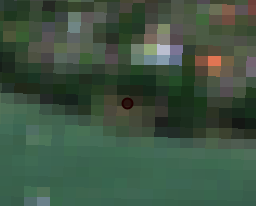

'Filename ./data/2-data-explore-events/6_174.702992745634_-36.927593097499_2023-02-13_2023-03-06.png'

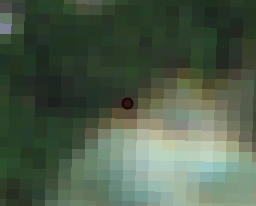

'Filename ./data/2-data-explore-events/7_174.653319614685_-37.0943919015828_2023-01-31_2023-02-21.png'

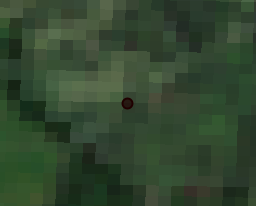

'Filename ./data/2-data-explore-events/8_174.746297568181_-36.8198594698531_2023-01-26_2023-02-16.png'

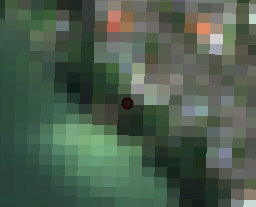

'Filename ./data/2-data-explore-events/9_174.716829737716_-36.9256941844427_2023-01-27_2023-02-17.png'

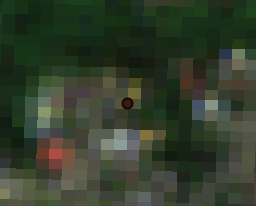

'Filename ./data/2-data-explore-events/10_174.684934100793_-36.7981335088127_2023-01-26_2023-02-16.png'

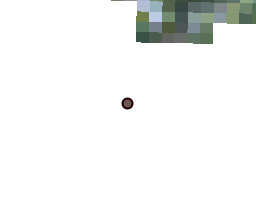

'Filename ./data/2-data-explore-events/11_174.780755882151_-36.8671726423134_2023-01-27_2023-02-17.png'

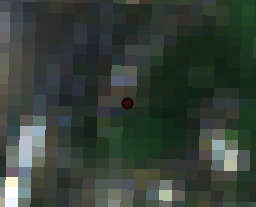

'Filename ./data/2-data-explore-events/12_174.805942955392_-36.8146697292219_2023-02-07_2023-02-28.png'

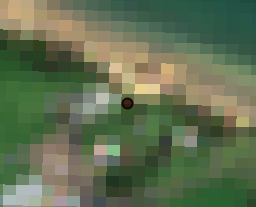

'Filename ./data/2-data-explore-events/13_174.668769561378_-36.9409476953432_2023-01-26_2023-02-16.png'

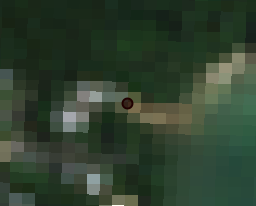

'Filename ./data/2-data-explore-events/14_174.744603895868_-36.9327879614425_2023-01-26_2023-02-16.png'

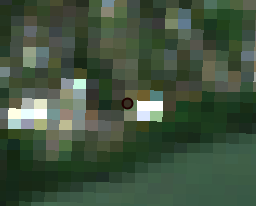

'Filename ./data/2-data-explore-events/15_174.792091678656_-36.8528847235917_2023-01-26_2023-02-16.png'

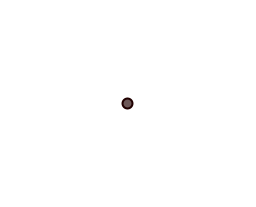

'Filename ./data/2-data-explore-events/16_174.603559053774_-37.0492662414968_2023-01-29_2023-02-19.png'

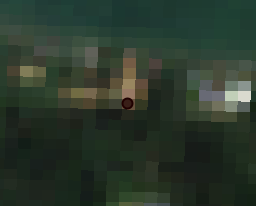

'Filename ./data/2-data-explore-events/17_174.718140918215_-36.809204304505_2023-01-27_2023-02-17.png'

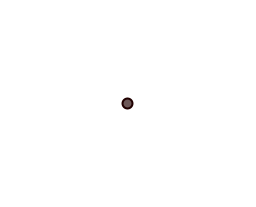

'Filename ./data/2-data-explore-events/19_174.653319614685_-37.0943919015828_2023-01-31_2023-02-21.png'

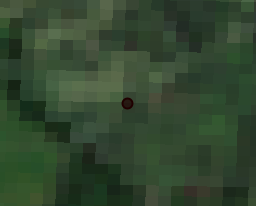

'Filename ./data/2-data-explore-events/20_174.679846096852_-36.7902605295893_2023-02-13_2023-03-06.png'

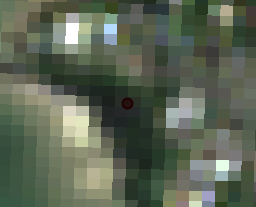

'Filename ./data/2-data-explore-events/21_174.690636905342_-36.8075358289513_2023-01-26_2023-02-16.png'

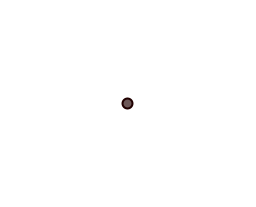

'Filename ./data/2-data-explore-events/22_174.690836038566_-36.8065082853975_2023-01-26_2023-02-16.png'

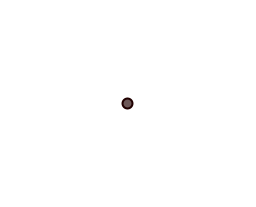

'Filename ./data/2-data-explore-events/23_174.701830351479_-36.9291273725072_2023-01-27_2023-02-17.png'

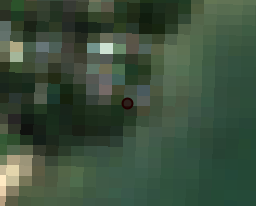

'Filename ./data/2-data-explore-events/24_174.740327212528_-36.9303378195003_2023-01-26_2023-02-16.png'

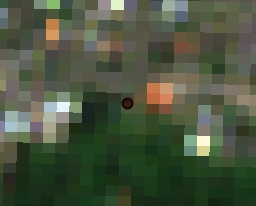

'Filename ./data/2-data-explore-events/25_174.733943611578_-36.7290558942885_2023-01-26_2023-02-16.png'

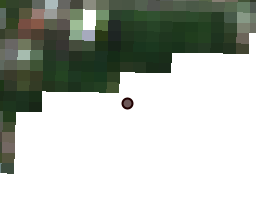

'Filename ./data/2-data-explore-events/26_174.744548160301_-36.932751103574_2023-01-26_2023-02-16.png'

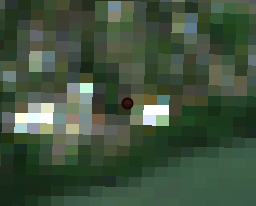

'Filename ./data/2-data-explore-events/27_174.735599688997_-36.9306710887067_2023-01-26_2023-02-16.png'

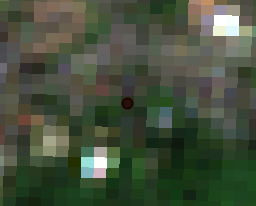

'Filename ./data/2-data-explore-events/28_174.482342131895_-36.9904166513491_2023-02-12_2023-03-05.png'

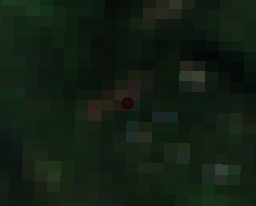

'Filename ./data/2-data-explore-events/29_174.668662142897_-36.9409641195673_2023-01-26_2023-02-16.png'

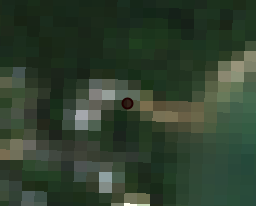

'Filename ./data/2-data-explore-events/30_174.592089374329_-36.9343760881123_2023-01-29_2023-02-19.png'

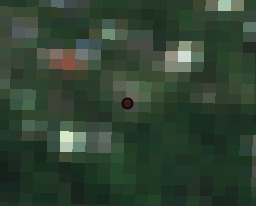

'Filename ./data/2-data-explore-events/31_174.718009293736_-36.8097607707592_2023-01-26_2023-02-16.png'

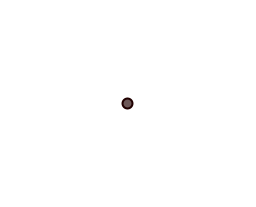

'Filename ./data/2-data-explore-events/32_174.607493506968_-36.9119146299933_2023-01-26_2023-02-16.png'

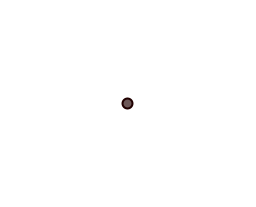

'Filename ./data/2-data-explore-events/33_174.713281988151_-36.8142905588939_2023-01-26_2023-02-16.png'

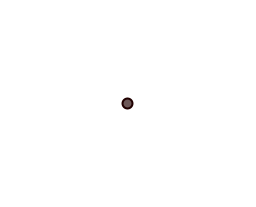

'Filename ./data/2-data-explore-events/126_174.666256109306_-36.7767912239579_2023-01-26_2023-02-16.png'

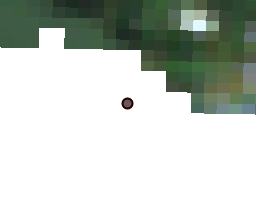

'Filename ./data/2-data-explore-events/155_174.744335157125_-36.9316484817737_2023-01-26_2023-02-16.png'

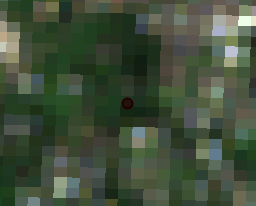

'Filename ./data/2-data-explore-events/1476_174.708104355375_-36.7902161604464_2023-01-27_2023-02-17.png'

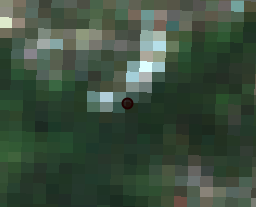

'Filename ./data/2-data-explore-events/1477_174.773966037271_-36.8289442494683_2023-01-26_2023-02-16.png'

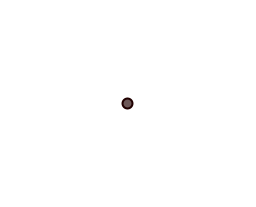

'Filename ./data/2-data-explore-events/1478_174.690928658615_-36.807560936298_2023-01-26_2023-02-16.png'

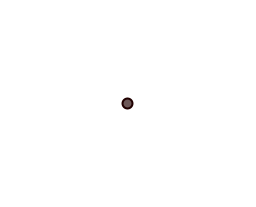

'Filename ./data/2-data-explore-events/1479_174.713944365606_-36.8140062237813_2023-01-26_2023-02-16.png'

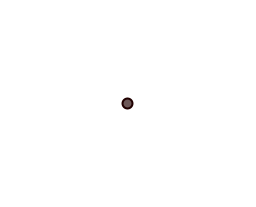

'Filename ./data/2-data-explore-events/1480_174.633112359622_-36.8229753352294_2023-01-26_2023-02-16.png'

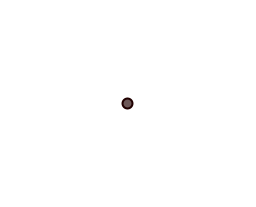

'Filename ./data/2-data-explore-events/1481_174.707183381082_-36.8130271996791_2023-01-26_2023-02-16.png'

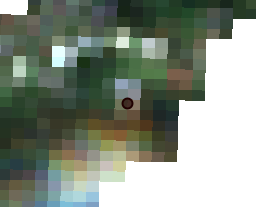

'Filename ./data/2-data-explore-events/1482_174.721033503283_-36.9080981955805_2023-01-26_2023-02-16.png'

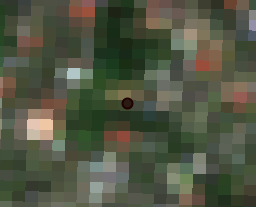

'Filename ./data/2-data-explore-events/1483_174.734117170421_-36.8159845289851_2023-01-26_2023-02-16.png'

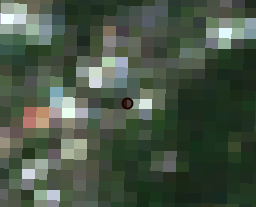

'Filename ./data/2-data-explore-events/1484_174.734117170421_-36.8159845289851_2023-01-26_2023-02-16.png'

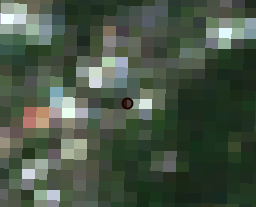

'Filename ./data/2-data-explore-events/2814_174.544090659079_-36.9627503873394_2023-01-29_2023-02-19.png'

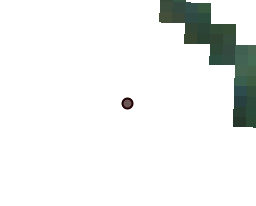

'Filename ./data/2-data-explore-events/2815_174.546790668392_-36.9653158287915_2023-01-29_2023-02-19.png'

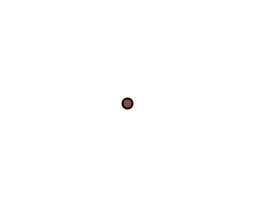

'Filename ./data/2-data-explore-events/7965_174.573516101499_-36.9464628363797_2023-01-29_2023-02-19.png'

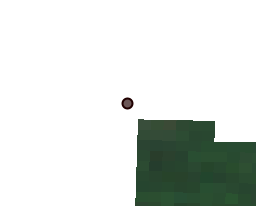

'Filename ./data/2-data-explore-events/7966_174.573490880108_-36.9481549532955_2023-01-29_2023-02-19.png'

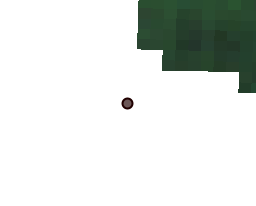

'Filename ./data/2-data-explore-events/7968_174.575889109309_-36.9510233656217_2023-01-29_2023-02-19.png'

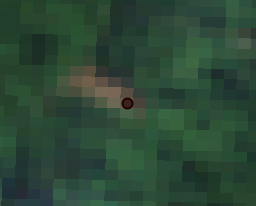

'Filename ./data/2-data-explore-events/7969_174.577281013646_-36.9505700309439_2023-01-29_2023-02-19.png'

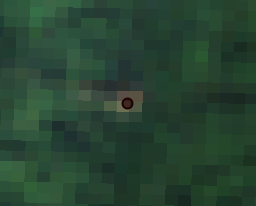

'Filename ./data/2-data-explore-events/7972_174.577888728775_-36.9520992164187_2023-01-29_2023-02-19.png'

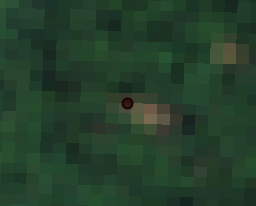

'Filename ./data/2-data-explore-events/7973_174.578704614064_-36.9516351476172_2023-01-29_2023-02-19.png'

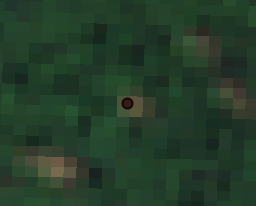

'Filename ./data/2-data-explore-events/7974_174.572762307717_-36.9592350261781_2023-01-29_2023-02-19.png'

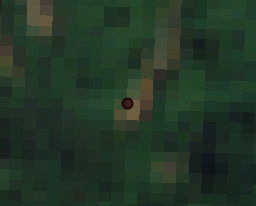

'Filename ./data/2-data-explore-events/7975_174.575279574077_-36.9584351646335_2023-01-29_2023-02-19.png'

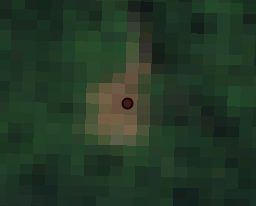

'Filename ./data/2-data-explore-events/7976_174.577717259425_-36.9580664211587_2023-01-29_2023-02-19.png'

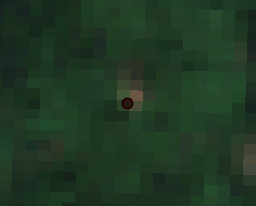

'Filename ./data/2-data-explore-events/7977_174.579242341409_-36.9587953893088_2023-01-29_2023-02-19.png'

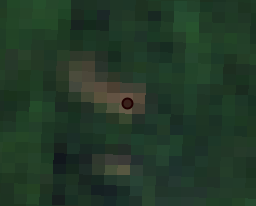

'Filename ./data/2-data-explore-events/7978_174.579243600964_-36.9593699484296_2023-01-29_2023-02-19.png'

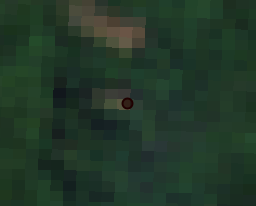

'Filename ./data/2-data-explore-events/7979_174.575606867627_-36.9660826406233_2023-01-29_2023-02-19.png'

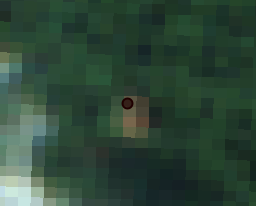

'Filename ./data/2-data-explore-events/7980_174.585081692206_-36.9664300458833_2023-01-29_2023-02-19.png'

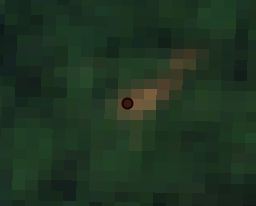

'Filename ./data/2-data-explore-events/7981_174.584706015723_-36.9624360618231_2023-01-29_2023-02-19.png'

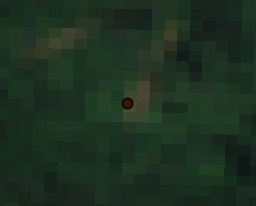

'Filename ./data/2-data-explore-events/7982_174.58384155424_-36.9619494767911_2023-01-29_2023-02-19.png'

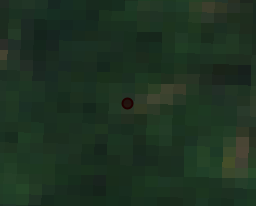

'Filename ./data/2-data-explore-events/7983_174.582493792056_-36.9612870536687_2023-01-29_2023-02-19.png'

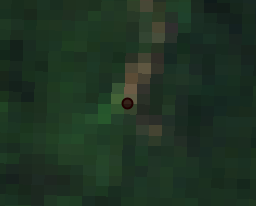

'Filename ./data/2-data-explore-events/7986_174.582021363252_-36.9509901510936_2023-01-29_2023-02-19.png'

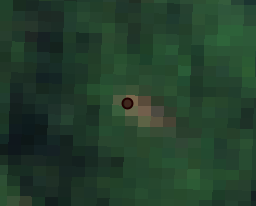

'Filename ./data/2-data-explore-events/7987_174.580579628912_-36.9497946392882_2023-01-29_2023-02-19.png'

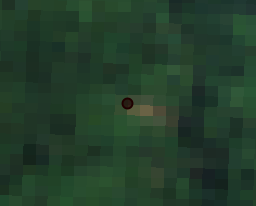

'Filename ./data/2-data-explore-events/7991_174.591389484467_-36.9490570230778_2023-01-29_2023-02-19.png'

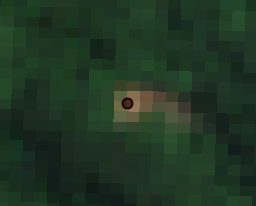

'Filename ./data/2-data-explore-events/7994_174.593843645655_-36.9648072361271_2023-01-29_2023-02-19.png'

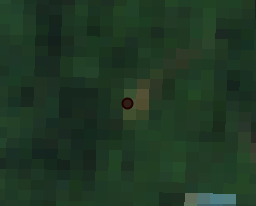

'Filename ./data/2-data-explore-events/7995_174.595133777708_-36.9654456074817_2023-01-29_2023-02-19.png'

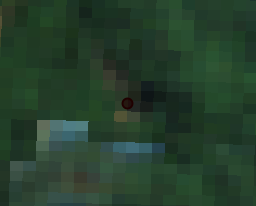

'Filename ./data/2-data-explore-events/7996_174.59173891446_-36.9652471775134_2023-01-29_2023-02-19.png'

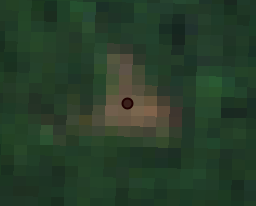

'Filename ./data/2-data-explore-events/8001_174.614567656146_-36.9459492455626_2023-01-29_2023-02-19.png'

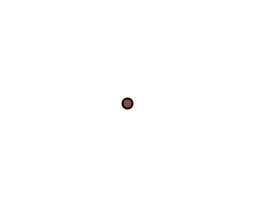

'Filename ./data/2-data-explore-events/8002_174.618987012271_-36.9505532614508_2023-01-29_2023-02-19.png'

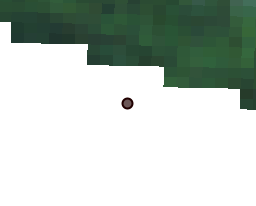

'Filename ./data/2-data-explore-events/8379_174.561811473118_-36.3577142709008_2023-01-29_2023-02-19.png'

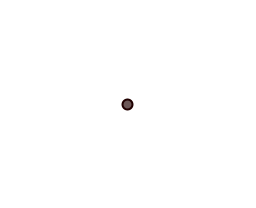

'Filename ./data/2-data-explore-events/8380_174.562673110788_-36.3580741444418_2023-01-29_2023-02-19.png'

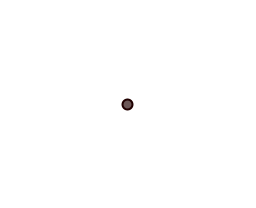

'Filename ./data/2-data-explore-events/8381_174.561108825628_-36.3578044703972_2023-01-29_2023-02-19.png'

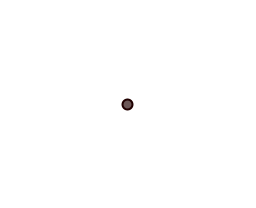

'Filename ./data/2-data-explore-events/8383_174.560386637975_-36.3571037134004_2023-01-29_2023-02-19.png'

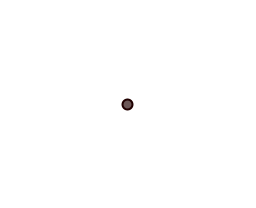

'Filename ./data/2-data-explore-events/8384_174.560437356884_-36.359016646068_2023-01-29_2023-02-19.png'

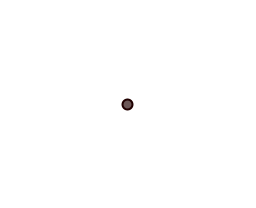

'Filename ./data/2-data-explore-events/8389_174.562962416805_-36.3589409683081_2023-01-29_2023-02-19.png'

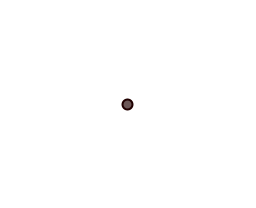

'Filename ./data/2-data-explore-events/8391_174.563372238163_-36.3598275728213_2023-01-29_2023-02-19.png'

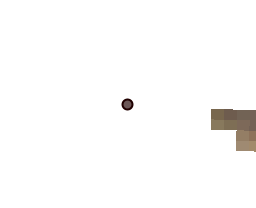

'Filename ./data/2-data-explore-events/8849_174.5695210266_-36.5294475746549_2023-01-29_2023-02-19.png'

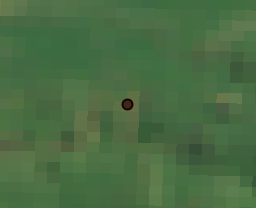

'Filename ./data/2-data-explore-events/8850_174.569118909234_-36.5274550352156_2023-01-29_2023-02-19.png'

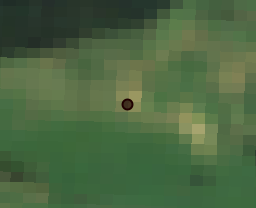

'Filename ./data/2-data-explore-events/8852_174.570230504355_-36.5270473260633_2023-01-29_2023-02-19.png'

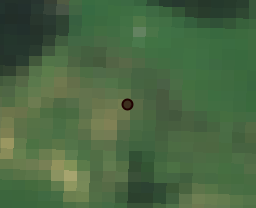

'Filename ./data/2-data-explore-events/8853_174.569671087489_-36.5269011306833_2023-01-29_2023-02-19.png'

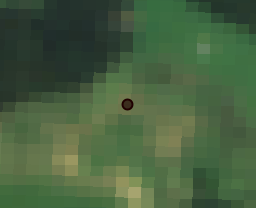

'Filename ./data/2-data-explore-events/8866_174.567747838123_-36.5191367689426_2023-01-29_2023-02-19.png'

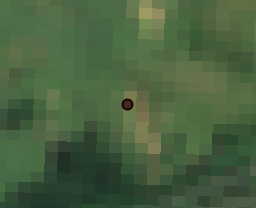

'Filename ./data/2-data-explore-events/8873_174.566209496476_-36.5292538014443_2023-01-29_2023-02-19.png'

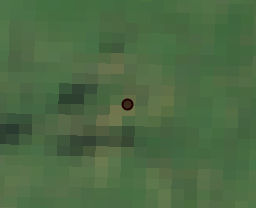

'Filename ./data/2-data-explore-events/8874_174.56648606749_-36.5291851294921_2023-01-29_2023-02-19.png'

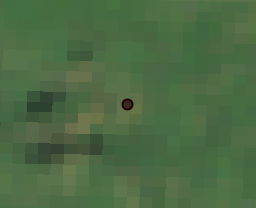

'Filename ./data/2-data-explore-events/8879_174.564914567677_-36.5303325073722_2023-01-29_2023-02-19.png'

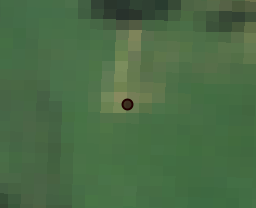

'Filename ./data/2-data-explore-events/8880_174.566130168601_-36.5289187875786_2023-01-29_2023-02-19.png'

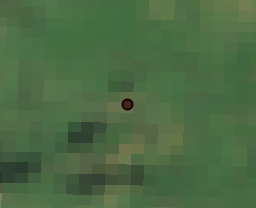

'Filename ./data/2-data-explore-events/8881_174.564871853299_-36.5242156659244_2023-01-29_2023-02-19.png'

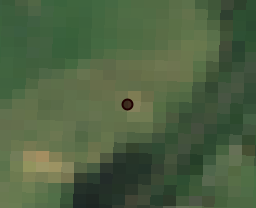

'Filename ./data/2-data-explore-events/8885_174.563906832433_-36.5248690075711_2023-01-29_2023-02-19.png'

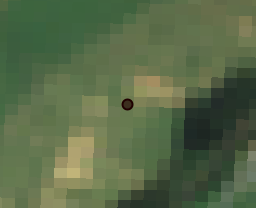

'Filename ./data/2-data-explore-events/8893_174.565060218458_-36.5195471775881_2023-01-29_2023-02-19.png'

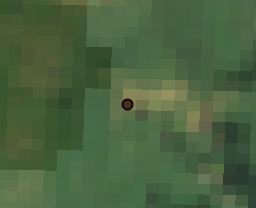

'Filename ./data/2-data-explore-events/8894_174.563853325987_-36.5191067221967_2023-01-29_2023-02-19.png'

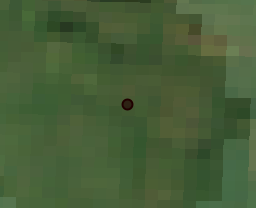

'Filename ./data/2-data-explore-events/8898_174.564275085535_-36.5184874986502_2023-01-29_2023-02-19.png'

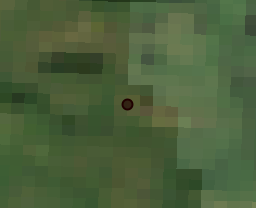

'Filename ./data/2-data-explore-events/9300_174.468092906694_-36.411291672432_2023-01-29_2023-02-19.png'

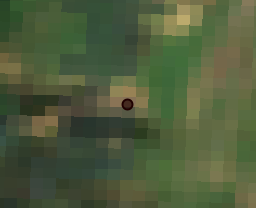

'Filename ./data/2-data-explore-events/9301_174.468114621085_-36.4116216909389_2023-01-29_2023-02-19.png'

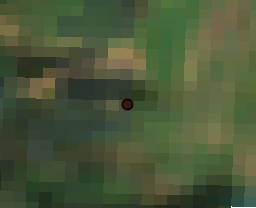

'Filename ./data/2-data-explore-events/9303_174.468396662561_-36.4097936003318_2023-01-29_2023-02-19.png'

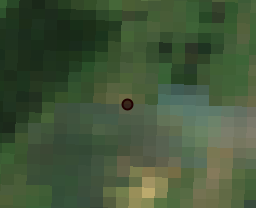

'Filename ./data/2-data-explore-events/9304_174.466973461464_-36.4109662474762_2023-01-29_2023-02-19.png'

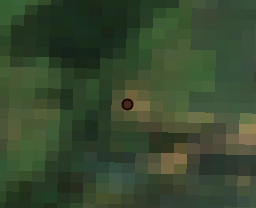

'Filename ./data/2-data-explore-events/9307_174.465700555523_-36.4096011298697_2023-01-29_2023-02-19.png'

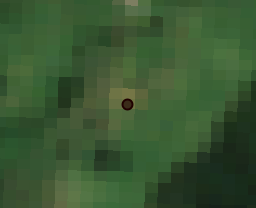

'Filename ./data/2-data-explore-events/9308_174.468757717415_-36.4072391596055_2023-01-29_2023-02-19.png'

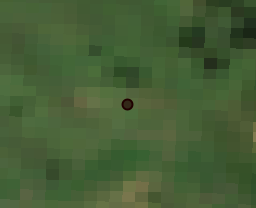

'Filename ./data/2-data-explore-events/9309_174.469006387344_-36.407328008982_2023-01-29_2023-02-19.png'

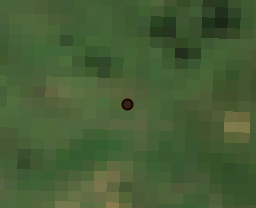

'Filename ./data/2-data-explore-events/9310_174.469915972146_-36.4075704837573_2023-01-29_2023-02-19.png'

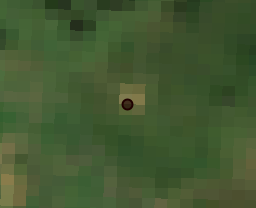

'Filename ./data/2-data-explore-events/9312_174.468837658181_-36.4082627634806_2023-01-29_2023-02-19.png'

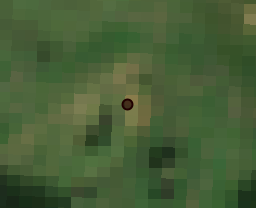

'Filename ./data/2-data-explore-events/9313_174.469052293236_-36.4080909217121_2023-01-29_2023-02-19.png'

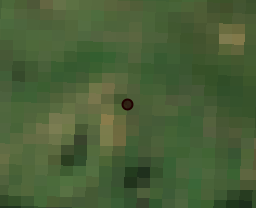

'Filename ./data/2-data-explore-events/9317_174.469074502962_-36.4098829415423_2023-01-29_2023-02-19.png'

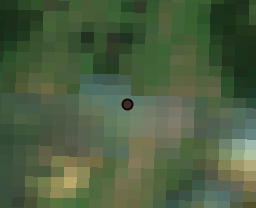

'Filename ./data/2-data-explore-events/9318_174.469061303888_-36.4096156661763_2023-01-29_2023-02-19.png'

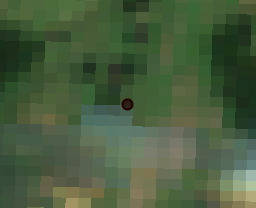

'Filename ./data/2-data-explore-events/9320_174.468581785848_-36.4105626297694_2023-01-29_2023-02-19.png'

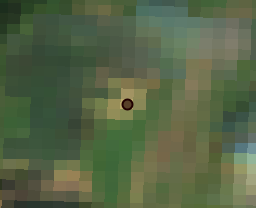

'Filename ./data/2-data-explore-events/9354_174.470843050161_-36.4085509819084_2023-01-29_2023-02-19.png'

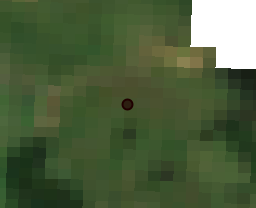

'Filename ./data/2-data-explore-events/9355_174.471187354444_-36.4081502271249_2023-01-29_2023-02-19.png'

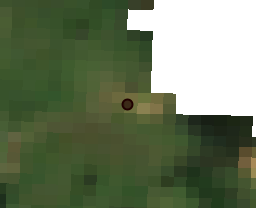

'Filename ./data/2-data-explore-events/9358_174.471214383214_-36.4074629331684_2023-01-29_2023-02-19.png'

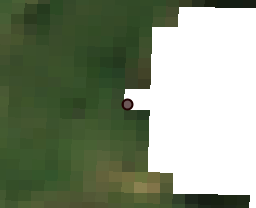

'Filename ./data/2-data-explore-events/9359_174.470596618927_-36.4062990209582_2023-01-29_2023-02-19.png'

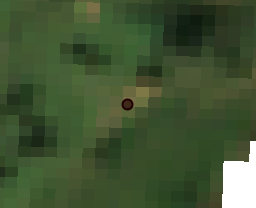

'Filename ./data/2-data-explore-events/9360_174.473653621302_-36.4078041074902_2023-01-29_2023-02-19.png'

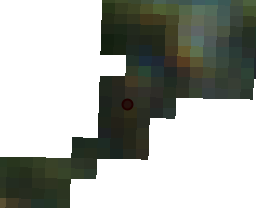

'Filename ./data/2-data-explore-events/9361_174.473667721703_-36.4076305298937_2023-01-29_2023-02-19.png'

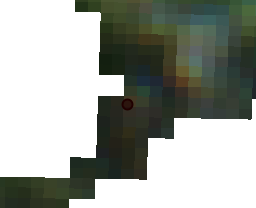

'Filename ./data/2-data-explore-events/9364_174.472670491405_-36.4089004367111_2023-01-29_2023-02-19.png'

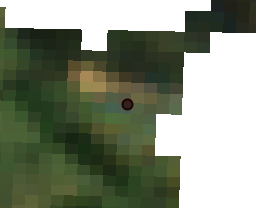

'Filename ./data/2-data-explore-events/9491_174.482928877184_-36.4059827795059_2023-01-29_2023-02-19.png'

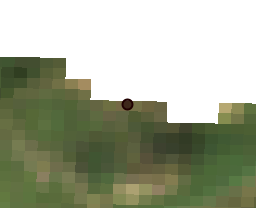

'Filename ./data/2-data-explore-events/9493_174.483681462676_-36.4060399692699_2023-01-29_2023-02-19.png'

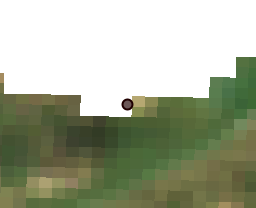

'Filename ./data/2-data-explore-events/9496_174.483219221746_-36.4060991497861_2023-01-29_2023-02-19.png'

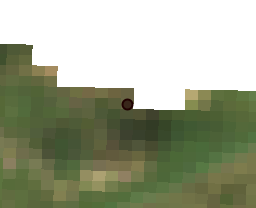

'Filename ./data/2-data-explore-events/9498_174.483377410107_-36.4064504799632_2023-01-29_2023-02-19.png'

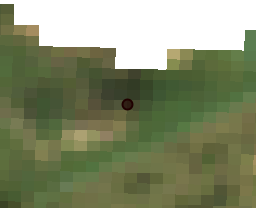

'Filename ./data/2-data-explore-events/9500_174.483310413128_-36.4066936372854_2023-01-29_2023-02-19.png'

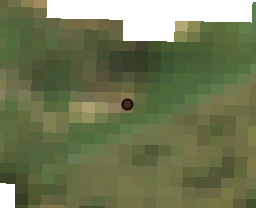

'Filename ./data/2-data-explore-events/9501_174.483156472888_-36.4067631731491_2023-01-29_2023-02-19.png'

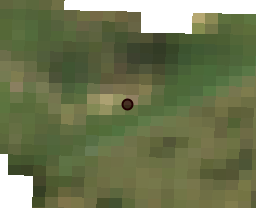

'Filename ./data/2-data-explore-events/9503_174.482337237998_-36.4064069092243_2023-01-29_2023-02-19.png'

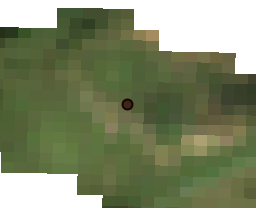

'Filename ./data/2-data-explore-events/9509_174.482625678849_-36.406922562696_2023-01-29_2023-02-19.png'

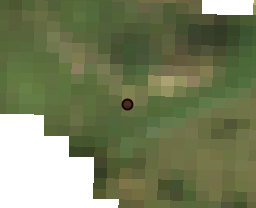

'Filename ./data/2-data-explore-events/9510_174.481433867586_-36.4071969201842_2023-01-29_2023-02-19.png'

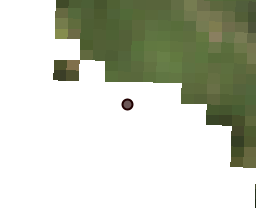

'Filename ./data/2-data-explore-events/9511_174.480927480185_-36.4068711374641_2023-01-29_2023-02-19.png'

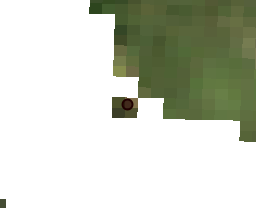

'Filename ./data/2-data-explore-events/9515_174.479470172098_-36.4076461836273_2023-01-29_2023-02-19.png'

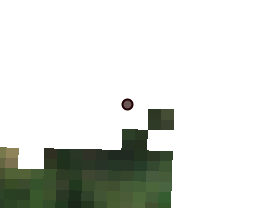

'Filename ./data/2-data-explore-events/9519_174.479109750491_-36.408324397703_2023-01-29_2023-02-19.png'

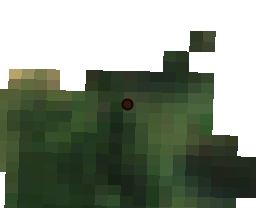

'Filename ./data/2-data-explore-events/9650_174.477335842416_-36.4088514215332_2023-01-29_2023-02-19.png'

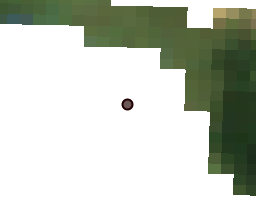

'Filename ./data/2-data-explore-events/9653_174.478565417373_-36.4081409054478_2023-01-29_2023-02-19.png'

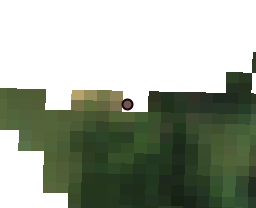

'Filename ./data/2-data-explore-events/9654_174.478448415845_-36.4081535529145_2023-01-29_2023-02-19.png'

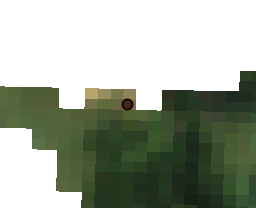

'Filename ./data/2-data-explore-events/9655_174.478313256117_-36.4081396359997_2023-01-29_2023-02-19.png'

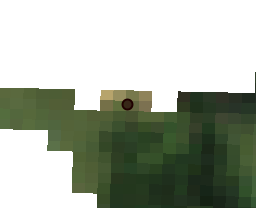

'Filename ./data/2-data-explore-events/9658_174.478231987015_-36.4076307299301_2023-01-29_2023-02-19.png'

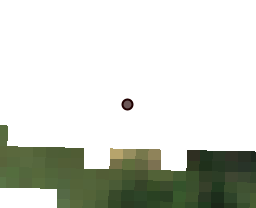

'Filename ./data/2-data-explore-events/11280_174.543881026625_-36.564693822369_2023-01-29_2023-02-19.png'

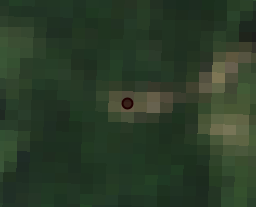

'Filename ./data/2-data-explore-events/11323_174.551195691389_-36.562980250311_2023-01-29_2023-02-19.png'

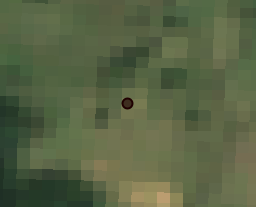

'Filename ./data/2-data-explore-events/11544_174.528176529747_-36.5638294879423_2023-01-29_2023-02-19.png'

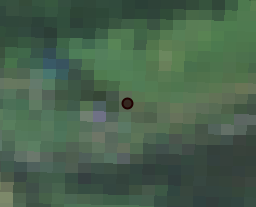

'Filename ./data/2-data-explore-events/11545_174.524861366025_-36.5652703977627_2023-01-29_2023-02-19.png'

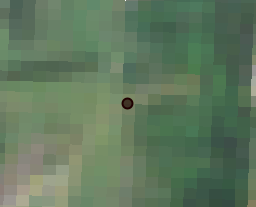

'Filename ./data/2-data-explore-events/11637_174.521782810722_-36.5659641834053_2023-01-29_2023-02-19.png'

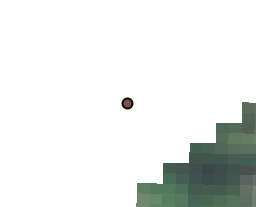

'Filename ./data/2-data-explore-events/11693_174.579299097023_-36.9511141857535_2023-01-29_2023-02-19.png'

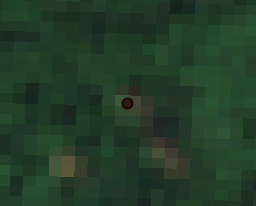

'Filename ./data/2-data-explore-events/11694_174.577327052332_-36.9531848460167_2023-01-29_2023-02-19.png'

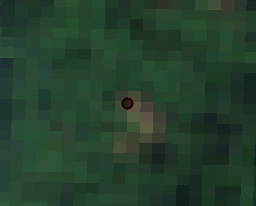

'Filename ./data/2-data-explore-events/11898_174.792299358367_-36.8531006145202_2023-01-26_2023-02-16.png'

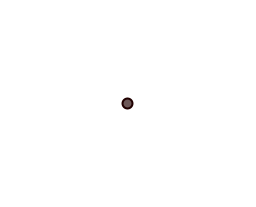

'Filename ./data/2-data-explore-events/11899_174.625725021567_-36.9417970494443_2023-01-27_2023-02-17.png'

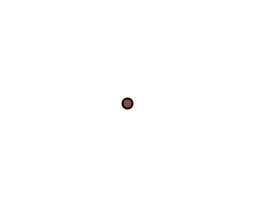

'Filename ./data/2-data-explore-events/11900_174.710566464673_-36.9256658197094_2023-01-26_2023-02-16.png'

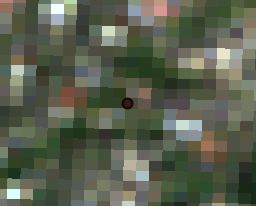

'Filename ./data/2-data-explore-events/11901_174.733455540282_-36.8037507496304_2023-01-26_2023-02-16.png'

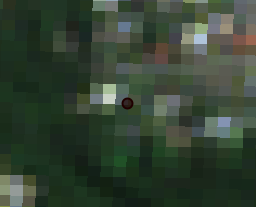

'Filename ./data/2-data-explore-events/11902_174.733379345631_-36.8038225069164_2023-01-26_2023-02-16.png'

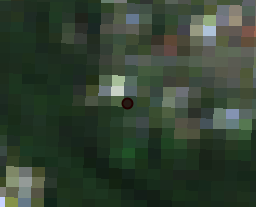

'Filename ./data/2-data-explore-events/11903_174.626178573531_-36.9354267150748_2023-01-26_2023-02-16.png'

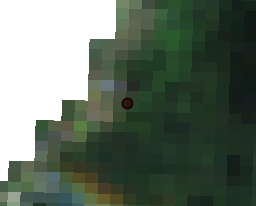

'Filename ./data/2-data-explore-events/11905_174.556928077112_-36.8686376994291_2023-01-26_2023-02-16.png'

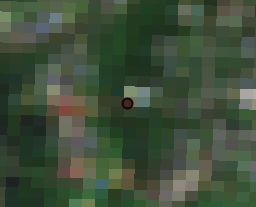

'Filename ./data/2-data-explore-events/11906_174.646471909892_-36.9447709450325_2023-01-26_2023-02-16.png'

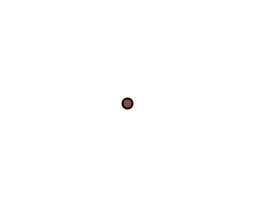

'Filename ./data/2-data-explore-events/11907_174.64655656753_-36.9445760003314_2023-01-26_2023-02-16.png'

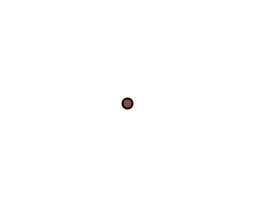

'Filename ./data/2-data-explore-events/11908_174.591768146988_-36.9347976148207_2023-01-29_2023-02-19.png'

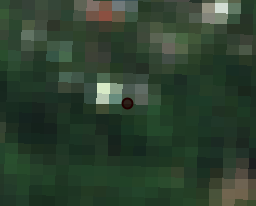

'Filename ./data/2-data-explore-events/11909_174.586210188655_-36.542706326647_2023-02-12_2023-03-05.png'

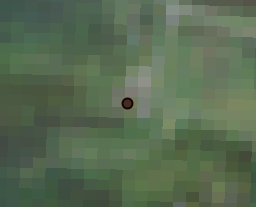

'Filename ./data/2-data-explore-events/11910_174.690927426242_-36.8075637182977_2023-01-26_2023-02-16.png'

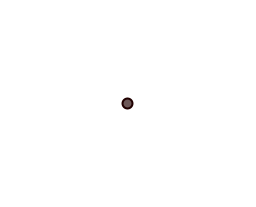

'Filename ./data/2-data-explore-events/11911_174.690856477682_-36.8074193964591_2023-01-26_2023-02-16.png'

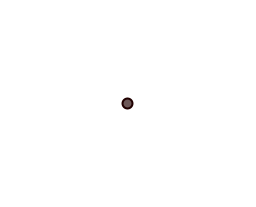

'Filename ./data/2-data-explore-events/11912_174.706529608883_-37.1338641012155_2023-01-26_2023-02-16.png'

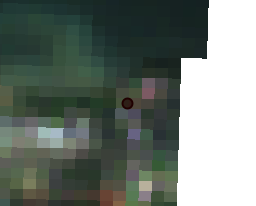

'Filename ./data/2-data-explore-events/11913_174.629223157042_-36.9381915876884_2023-01-26_2023-02-16.png'

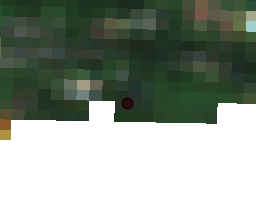

'Filename ./data/2-data-explore-events/11914_174.663083587046_-36.9446829933302_2023-01-27_2023-02-17.png'

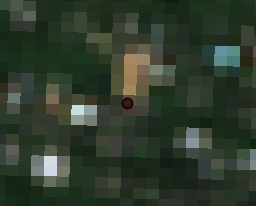

'Filename ./data/2-data-explore-events/11915_174.797044149013_-36.8658719228886_2023-01-26_2023-02-16.png'

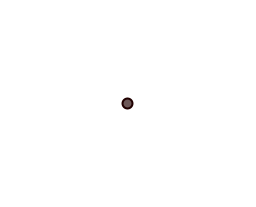

In [ ]:
vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 2500, 'gamma': 1.1}
day_offset = 21
for idx, _event in gdf_jan.iterrows():
    _point = _event.geometry.centroid
    _lon = _point.x
    _lat = _point.y
    _point_geom = ee.Geometry.Point(_lon, _lat)
    _aoi = _point_geom.buffer(100)
    thumb_params = {
        'dimensions': 256,
        'region': _aoi,
        'format': 'png',
    }
    _start_date = _event['dateoccurence'].date().strftime("%Y-%m-%d")
    _end_date = (_event['dateoccurence'].date() 
                + pd.Timedelta(days=day_offset)).strftime("%Y-%m-%d")
    image = s2cloudless.cloud_free_col(_aoi, _start_date, _end_date, buffer=buffer, cloud_filter=cloud_filter)

    # Select only RGB bands to match the point image
    rgb_image = image.select(['B4', 'B3', 'B2'])
    
    # Create a red point marker
    point_feature = ee.FeatureCollection([ee.Feature(_point_geom)])
    point_image = point_feature.style(**{'color': 'red', 'pointSize': 5, 'width': 2})
    
    # Blend the point marker with the RGB satellite image
    image_with_marker = rgb_image.blend(point_image)
    
    url = rgb_image.getThumbURL({**vis_params, **thumb_params})
    url_with_marker = image_with_marker.getThumbURL({**vis_params, **thumb_params})

    filename = f"{idx}_{_lon}_{_lat}_{_start_date}_{_end_date}.png"
    filename_with_marker = f"{idx}_{_lon}_{_lat}_{_start_date}_{_end_date}_marker.png"
    # ensure output directory exists and save thumbnail
    out_dir = './data/2-data-explore-events/'
    os.makedirs(out_dir, exist_ok=True)
    filepath = os.path.join(out_dir, filename)
    filepath_with_marker = os.path.join(out_dir, filename_with_marker)
    if os.path.exists(filepath) and os.path.exists(filepath_with_marker):
        continue
    try:
        urllib.request.urlretrieve(url, filepath)
        urllib.request.urlretrieve(url_with_marker, filepath_with_marker)
        # update filename to the saved path for display
        filename = filepath
    except Exception as e:
        print(f"Failed to download thumbnail for index {idx}: {e}")
        continue
    display(f"Filename {filename}")
    display(Image(filename=filepath_with_marker))
